In [1]:
%load_ext autoreload
%autoreload 2

import keras
import keras.applications

Using TensorFlow backend.


In [3]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
xception = keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
resnet50 = keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
mobilenet = keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [65]:
densenet = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [4]:
nasnet = keras.applications.nasnet.NASNetMobile(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

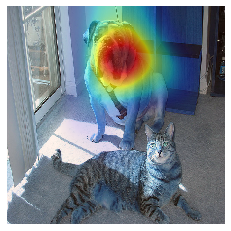

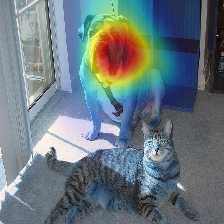

In [11]:
import eli5
import os
import matplotlib.pyplot as plt

def show_dir(model, img_dir, *args, **kwargs):
    imgs = os.listdir(img_dir)
    for i, img in enumerate(imgs):
        I = show(model, os.path.join(img_dir, img), *args, **kwargs)

def show(model, img, *args, **kwargs):
    E = eli5.explain_prediction(model, img, *args, **kwargs)
    I = eli5.formatters.image.format_as_image(E)
    return I

img = 'examples/cat_dog.jpg'
img2 = 'examples/170997360_8193925eef.jpg'
# show(vgg16, img, layers="block5_conv3", preprocessing=keras.applications.vgg16.preprocess_input)

# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[282], target_decoder=keras.applications.xception.decode_predictions) # 'tiger cat'
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[904], target_decoder=keras.applications.xception.decode_predictions) # 'window screen'
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[59], target_decoder=keras.applications.xception.decode_predictions) # 'vine snake'
# show_dir(xception, 'examples/', layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input)

show(resnet50, img, preprocessing=keras.applications.resnet50.preprocess_input)

# TESTMODELS = [
# #     (xception, keras.applications.xception.preprocess_input, "block14_sepconv2_act"),
#     (resnet50, keras.applications.resnet50.preprocess_input),
#     (mobilenet, keras.applications.mobilenet.preprocess_input),
#     (densenet, keras.applications.densenet.preprocess_input),
#     (nasnet, keras.applications.nasnet.preprocess_input),
# ]
# for model, preprocess_fn in TESTMODELS:
#     print(model.name)
#     show_dir(model, 'examples', layers="block14_sepconv2_act", preprocessing=preprocess_fn)
#     print('='*50, end='\n\n\n')

# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show(resnet50, 'examples/cat_dog.jpg', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)

# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show(nasnet, '../my_example4_edited.jpg')

In [10]:
import numpy as np
a = np.array([1, 2, 3])
np.minimum(a, 2)

def f(): pass
callable(f)

True

In [29]:
from IPython.core.display import display, HTML
display(HTML('<img src="./examples/cat_dog.jpg"></img>'))

In [32]:
%%html
<canvas id="myCanvas" width="200" height="100" style="border:1px solid #000000;">
    var c = document.getElementById("myCanvas");
    var ctx = c.getContext("2d");
    ctx.moveTo(0, 0);
    ctx.lineTo(200, 100);
    ctx.stroke(); 
</canvas>
<!-- error: [W 13:28:10.046 NotebookApp] 404 GET /static/components/proptypes/index.js.map (127.0.0.1) 421.81ms referer=None
-->

In [32]:
%%html
'<img src="./examples/cat_dog.jpg" width=224 height=224></img>

import tensorflow as tf
import numpy as np
a = np.array([2, 3])
b = np.array([4, 5])
with tf.Session().as_default():
    print(tf.multiply(a, b).eval())
print(a*b)